#Classfication Evaluation Metrics

In this notebook we'll learn about a few common metrics by which we analyse and measure the classification model


But first, this is a good oportunity to summarize the feature selection topic


#Feature Selection Techniques 
Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Irrelevant or partially relevant features can negatively impact model performance.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

Feature selection and Data cleaning should be the first and most important step of your model designing.

##Benefits of performing feature selection before modeling your data

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.




## The Data set

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go


In [ ]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/diabetes.csv')

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   appt                      768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   SkinThickness             768 non-null    int64  
 8   a1c                       768 non-null    float64
 9   Age                       768 non-null    int64  
 10  Outcome                   768 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 66.1 KB


In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,appt,Insulin,BMI,DiabetesPedigreeFunction,SkinThickness,a1c,Age,Outcome
0,6,148,72,0.016301,0,33.6,0.627,35,9.033109,50,1
1,1,85,66,0.344987,0,26.6,0.351,29,1.105190,31,0
2,8,183,64,0.378963,0,23.3,0.672,0,2.377655,32,1
3,1,89,66,0.783727,94,28.1,0.167,23,6.783883,21,0
4,0,137,40,0.370406,168,43.1,2.288,35,4.831895,33,1


##About the Dataset
###Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

###Content
The following features have been provided to help us predict whether a person is diabetic or not:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Appt: fraction of doctor appointments attendence
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

##Data Preparation


In [ ]:
#what are the insulin possible values?
diabetes_df.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
#replace 0 with mean for insulin level
insu_mean = round(diabetes_df.Insulin.mean())

diabetes_df.Insulin.loc[diabetes_df.Insulin==0] = insu_mean

diabetes_df.Insulin.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



80     374
105     11
140      9
130      9
120      8
      ... 
270      1
271      1
272      1
274      1
14       1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
diabetes_df.drop(['Insulin'], axis=1, inplace=True)

In [ ]:
#check for Nans
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
appt                        0
BMI                         0
DiabetesPedigreeFunction    0
SkinThickness               0
a1c                         0
Age                         0
Outcome                     0
dtype: int64

#EDA


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,appt,BMI,DiabetesPedigreeFunction,SkinThickness,a1c,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,0.499944,31.992578,0.471876,20.536458,5.014949,33.240885,0.338542
std,3.369578,31.972618,19.355807,0.286516,7.884160,0.331329,15.952218,2.841433,11.760232,0.473522
min,0.000000,0.000000,0.000000,0.000098,0.000000,0.078000,0.000000,0.012376,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.255590,27.300000,0.243750,0.000000,2.517396,24.000000,0.000000
50%,3.000000,117.000000,72.000000,0.494833,32.000000,0.372500,23.000000,5.140862,29.000000,0.000000
75%,6.000000,140.250000,80.000000,0.733105,36.600000,0.626250,32.000000,7.464107,41.000000,1.000000
max,17.000000,199.000000,122.000000,0.999744,67.100000,2.420000,99.000000,9.982058,81.000000,1.000000


How many cases have diabetes?


In [ ]:
diabetes_count = diabetes_df.Outcome.value_counts()
diabetes_count

0    508
1    260
Name: Outcome, dtype: int64

Is this a valid data set? 


In [ ]:
#get precentage
percentage = [str(round(dia/diabetes_count.sum(),2)*100)+'%' for dia in diabetes_count ]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['No', 'Yes'],
    y=diabetes_count,
    marker_color=['blue','orange'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    title='Diabetes detection', 
    yaxis_title='Number of cases',
    )
fig.show()

inference :

66% of cases do not have diabetes

---



Show bar chart of diabetes by Age distribuation 

In [ ]:
ages = diabetes_df.pivot_table(index='Age', values='Outcome', aggfunc='mean')
ages['no'] = 1-ages.Outcome
ages.columns = ['Yes', 'No']
ages.head()

,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Outcome,Pregnancies,SkinThickness,a1c,appt
Age,,,,,,,,,
21,27.817460,65.936508,0.433825,108.317460,0.079365,1.079365,19.349206,4.995794,0.454530
22,29.509722,63.722222,0.430625,108.208333,0.138889,1.555556,20.486111,5.153341,0.455676
23,31.502632,64.315789,0.438579,111.578947,0.157895,1.578947,22.368421,4.242351,0.504361
24,32.569565,64.956522,0.393565,117.891304,0.173913,1.891304,25.934783,5.648687,0.488084
25,31.943750,59.666667,0.600500,110.083333,0.250000,1.770833,23.958333,5.142493,0.525859


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=ages.index, y=ages.No, name='No Diabetes'))
fig.add_trace(go.Bar(x=ages.index, y=ages.Yes, name='Diabetes'))
fig.update_layout(
    title_text='Distribution of ages', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates,
    barmode='stack'
)

fig.show()

Inference:
Dibetes manifests more often in cases of age 40 to 60

Pair plot


In [ ]:
dimensions = [dict(label=x, values=diabetes_df[x]) for x in diabetes_df.columns if x != 'Outcome']
fig = go.Figure()
fig.add_trace(go.Splom(dimensions=dimensions))
fig.update_traces(
    marker=dict(color=diabetes_df['Outcome'],
                size=5,
                colorscale='Bluered',
                line=dict(width=0.5,
                color='rgb(230,230,230)')),
    text=['non-diabetic' if outcome==0 else 'diabetic' for outcome in diabetes_df['Outcome']],
    diagonal=dict(visible=True)
)
fig.update_layout(
    font=dict(
        family="monospace",
        size=8,
        color="RebeccaPurple"
    ),

    height=900
)
fig.show()


### We should do more EDA 
But the purpose of this notebook is to handle feature selection, So let's concentrate on that.

#Feature Selection Methods:


###**1.Remove irrelevant features** 

Features like ID's , name, serial numbers, zero variance features,  etc... are irrelevant features. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

In [ ]:
#1. remove irrelevant features


###**2.Remove highly correlated independent features** using Pearson correlation.


Correlation states how the features are related to each other or the target variable.

The correlation coefficient has values between -1 to 1.


— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)


— A value closer to 1 implies stronger positive correlation


— A value closer to -1 implies stronger negative correlation

If some variables are correlated with each other, then we need to keep only one of them and drop the rest.

In [ ]:
corr_df = diabetes_df.corr()
corr_df

,Pregnancies,Glucose,BloodPressure,appt,BMI,DiabetesPedigreeFunction,SkinThickness,a1c,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.015947,0.017683,-0.033523,-0.081672,-0.048315,0.544341,0.229846
Glucose,0.129459,1.000000,0.152590,-0.005523,0.221071,0.137337,0.057328,-0.019358,0.263514,0.463343
BloodPressure,0.141282,0.152590,1.000000,-0.012474,0.281805,0.041265,0.207371,0.036198,0.239528,0.068789
appt,0.015947,-0.005523,-0.012474,1.000000,-0.003747,-0.005480,0.052175,-0.015742,-0.007974,0.011301
BMI,0.017683,0.221071,0.281805,-0.003747,1.000000,0.140647,0.392573,0.020999,0.036242,0.308588
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,-0.005480,0.140647,1.000000,0.183928,0.023907,0.033561,0.189205
SkinThickness,-0.081672,0.057328,0.207371,0.052175,0.392573,0.183928,1.000000,0.028821,-0.113970,0.088634
a1c,-0.048315,-0.019358,0.036198,-0.015742,0.020999,0.023907,0.028821,1.000000,-0.026813,-0.031190
Age,0.544341,0.263514,0.239528,-0.007974,0.036242,0.033561,-0.113970,-0.026813,1.000000,0.234680
Outcome,0.229846,0.463343,0.068789,0.011301,0.308588,0.189205,0.088634,-0.031190,0.234680,1.000000


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

Inference:

There are no highly correlated features in this DF.

###**3.For linear regression only - Select the features that are highly correlated to the target** using Pearson correlation.

Use the same correlation matrix from the previous technique and only keep the variables with high correlation to the target

In [ ]:
high_corr = corr_df.Outcome.iloc[0:-1].sort_values(ascending=False)
high_corr_df = pd.DataFrame({'high_corr_to_target':high_corr}, index=high_corr.index)
high_corr_df

,high_corr_to_target
Glucose,0.463343
BMI,0.308588
Age,0.234680
Pregnancies,0.229846
DiabetesPedigreeFunction,0.189205
SkinThickness,0.088634
BloodPressure,0.068789
appt,0.011301
a1c,-0.031190


###**4.Univariate Selection Statistical Test**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

* SelectKBest removes all but the k highest scoring features

These objects take as input a scoring function that returns univariate f-scores
* For regression use: f_regression

>The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables

* For classification use: chi2

>It determines if the association between two categorical variables of the sample would reflect their real association in the population.


In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df.Outcome

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.to_list()
print("The top 6 top scored features are ",chi_feature)

The top 6 top scored features are  ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Age']


In [ ]:
scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = pd.Series(chi_selector.pvalues_.tolist()) 
selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate = selected_df.sort_values(by='univariate_score', ascending=False)
univariate

,univariate_score,p_values
Glucose,1392.355592,9.628936e-305
Age,175.754930,4.095919e-40
BMI,141.910823,1.017139e-32
Pregnancies,119.651895,7.539535e-28
SkinThickness,74.664601,5.578752e-18
BloodPressure,19.676373,9.172854e-06
DiabetesPedigreeFunction,6.387809,1.149068e-02
a1c,1.201238,2.730743e-01
appt,0.016086,8.990757e-01


We can see that in this test results the p-value corresponds with the univaritate score. 

But this is not always the case. Although P-value can be used as an alternative to or in a addition to pre-selected confidence levels for hypothesis testing, it's recommended to look for other tests reinforcing results. 

###**5. Feature importance**

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.


Feature importance is an inbuilt class that comes with Tree Based Classifiers(covered in the next lab), we will be using xgboost Tree Classifier for extracting the top features for the dataset.

In [ ]:
from xgboost import XGBClassifier


In [ ]:
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=X.columns)
feat_importances_df=feat_importances_df.sort_values(by='feature_importance', ascending=False)
feat_importances_df

,feature_importance
Glucose,0.279777
BMI,0.163531
Age,0.140218
Pregnancies,0.100896
SkinThickness,0.083467
DiabetesPedigreeFunction,0.082590
appt,0.055035
BloodPressure,0.048647
a1c,0.045840


###**6. Have Doubt**
Always check the result and make sure you understand them before proceeding. Feel free to examine other permutations and statistical tests. 


##Results summary
* Although all the technics provide similar results. We need to make sure we understand our data first or else the results might be misleading.


---------------

##Split and scale the DF

In [ ]:
#scale the DF
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=diabetes_df.columns[0:-1])
scaled_X.head()

,Pregnancies,Glucose,BloodPressure,appt,BMI,DiabetesPedigreeFunction,SkinThickness,a1c,Age
0,0.639947,0.848324,0.149641,-1.689112,0.204013,0.468492,0.907270,1.415053,1.425995
1,-0.844885,-1.123396,-0.160546,-0.541185,-0.684422,-0.365061,0.530902,-1.376878,-0.190672
2,1.233880,1.943724,-0.263941,-0.422525,-1.103255,0.604397,-1.288212,-0.928761,-0.105584
3,-0.844885,-0.998208,-0.160546,0.991104,-0.494043,-0.920763,0.154533,0.622956,-1.041549
4,-1.141852,0.504055,-1.504687,-0.452409,1.409746,5.484909,0.907270,-0.064465,-0.020496


In [ ]:

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)




,Pregnancies,Glucose,BloodPressure,appt,BMI,DiabetesPedigreeFunction,SkinThickness,a1c,Age,Outcome
113,0.046014,-1.405071,-0.367337,-1.223616,0.254780,-0.244256,-1.288212,0.068384,-0.701198,0
395,-0.547919,0.191084,-0.574128,0.403311,-0.544811,3.407067,0.217261,-0.455060,-0.701198,0
453,-0.547919,-0.059293,-3.572597,1.531638,-1.572857,1.087616,-1.288212,-1.635896,3.297926,0
401,0.639947,0.504055,-0.419034,-1.518539,-0.989028,-0.969085,-1.288212,-0.561525,1.851434,0
245,1.530847,1.975021,0.821712,1.128750,-0.252897,2.238282,-0.347291,0.514738,1.340908,1
378,0.046014,1.098701,0.304734,0.946435,2.069726,-0.706334,-1.288212,0.267622,-0.105584,1
605,-0.844885,0.097192,-0.470732,-0.634560,0.483235,0.127219,0.719086,0.982007,-1.041549,0
348,-0.250952,-0.685236,-0.367337,-0.164473,-1.293634,-0.582509,-0.096379,-0.566302,-0.616111,0
13,-0.844885,2.131507,-0.470732,-0.261752,-0.240205,-0.223115,0.154533,0.893939,2.191785,1
57,-1.141852,-0.653939,0.976805,1.624735,1.879347,1.480232,2.475471,0.963590,-0.190672,0


#Evaluation of the diabetes model


#Excercise
1. create a Train set that include the top 5 features of each test. 
2. create 2 logistic regression classifiers. One is for each of the tests
3. Train the models
4. Test the models by predicting on the test sets


In [ ]:
#1 
uni_X_train = X_train[univariate.index.to_list()[:6]]
imp_X_train = X_train[feat_importances_df.index.to_list()[:6]]


uni_X_test = X_test[univariate.index.to_list()[:6]]
imp_X_test = X_test[feat_importances_df.index.to_list()[:6]]

imp_X_train

,Glucose,BMI,Age,Pregnancies,SkinThickness,DiabetesPedigreeFunction
113,-1.405071,0.254780,-0.701198,0.046014,-1.288212,-0.244256
395,0.191084,-0.544811,-0.701198,-0.547919,0.217261,3.407067
453,-0.059293,-1.572857,3.297926,-0.547919,-1.288212,1.087616
401,0.504055,-0.989028,1.851434,0.639947,-1.288212,-0.969085
245,1.975021,-0.252897,1.340908,1.530847,-0.347291,2.238282
...,...,...,...,...,...,...
372,-1.154694,0.483235,-1.041549,-1.141852,0.091805,0.220842
204,-0.560048,0.724382,1.851434,0.639947,0.719086,-0.446604
53,1.724644,0.216705,2.106697,1.233880,0.844542,-0.014727
294,1.255187,-1.280942,2.702312,-1.141852,-1.288212,-0.658012


In [ ]:
#2,#3
from sklearn.linear_model import LogisticRegression

#univariance model

uni_logmodel = LogisticRegression()
uni_logmodel.fit(uni_X_train, y_train)

#top features model

imp_logmodel = LogisticRegression()
imp_logmodel.fit(imp_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#4
uni_probability = uni_logmodel.predict_proba(uni_X_test)
uni_prediction = uni_logmodel.predict(uni_X_test)
uni_prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
y_test_prob_0 =pd.Series(uni_probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 =pd.Series(uni_probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(uni_prediction, name='prediction', index=y_test.index)

uni_test_results = pd.DataFrame(data={'probability_0':y_test_prob_0, 'probability_1':y_test_prob_1,'prediction':y_test_pred, 'actual':y_test})
uni_test_results

,probability_0,probability_1,prediction,actual
200,0.888480,0.111520,0,0
40,0.246510,0.753490,1,0
630,0.742474,0.257526,0,1
356,0.713799,0.286201,0,1
305,0.664116,0.335884,0,0
...,...,...,...,...
44,0.372265,0.627735,1,0
226,0.866254,0.133746,0,0
220,0.337956,0.662044,1,1
160,0.613744,0.386256,0,0


In [ ]:
imp_probability = imp_logmodel.predict_proba(imp_X_test)
imp_prediction = imp_logmodel.predict(imp_X_test)


y_test_prob_0 =pd.Series(imp_probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 =pd.Series(imp_probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(imp_prediction, name='prediction', index=y_test.index)

imp_test_results = pd.DataFrame(data={'probability_0':y_test_prob_0, 'probability_1':y_test_prob_1,'prediction':y_test_pred, 'actual':y_test})
imp_test_results

,probability_0,probability_1,prediction,actual
200,0.787101,0.212899,0,0
40,0.316220,0.683780,1,0
630,0.659128,0.340872,0,1
356,0.663113,0.336887,0,1
305,0.730834,0.269166,0,0
...,...,...,...,...
44,0.417948,0.582052,1,0
226,0.870630,0.129370,0,0
220,0.223267,0.776733,1,1
160,0.624728,0.375272,0,0


In [ ]:
uni_correct_rows = uni_test_results.loc[uni_test_results.actual==uni_test_results.prediction].any(axis=1).count()
accuracy = round(uni_correct_rows/len(uni_test_results),3)
accuracy

0.797

In [ ]:
imp_correct_rows =  imp_test_results.loc[imp_test_results.prediction==imp_test_results.actual].any(axis=1).count()
imp_accuracy = round(imp_correct_rows/len(imp_test_results),3)
imp_accuracy

0.784

#Evaluation of a classification model 
We all have created classification models. A lot of time we try to increase evaluate our models on accuracy. But do we really want accuracy as a metric of our model performance?

What if we are predicting the number of asteroids that will hit the earth.

Just say zero all the time. And you will be 99% accurate. My model can be reasonably accurate, but not at all valuable. What should we do in such cases?

The following cells are 3 out of many various evaluation metrics and how and when to use them.

##The Confusion Matrix

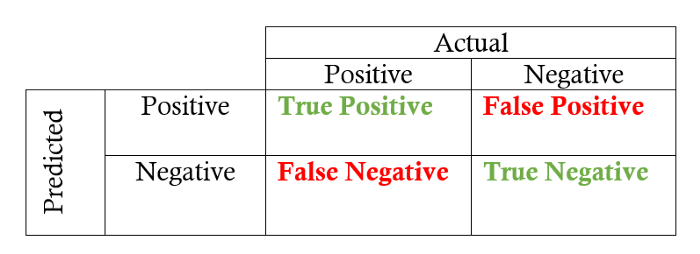

## 1. Accuracy, Precision, and Recall 




###A. Accuracy

Accuracy is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem.

**Accuracy = (TP+TN)/(TP+FP+FN+TN)**

Accuracy is the proportion of true results among the total number of cases examined.

**When to use?**

Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

**Caveats**

Let us say that our target class is very sparse. Do we want accuracy as a metric of our model performance? What if we are predicting if an asteroid will hit the earth? Just say No all the time. And you will be 99% accurate. My model can be reasonably accurate, but not at all valuable.


###B. Precision
Let’s start with precision, which answers the following question:

what proportion of predicted Positives is truly Positive?

**Precision = (TP)/(TP+FP)**

In the asteroid prediction problem, we never predicted a true positive.
And thus precision=0

**When to use?**

Precision is a valid choice of evaluation metric when we want to be very sure of our prediction. 

For example: If we are building a system to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction.

**Caveats**


Being very precise means our model will leave a lot of credit defaulters untouched and hence lose money.



###C. Recall
Another very useful measure is recall, which answers a different question: what proportion of actual Positives is correctly classified?

**Recall = (TP)/(TP+FN)**

In the asteroid prediction problem, we never predicted a true positive.
And thus recall is also equal to 0.

When to use?

Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.

Caveats

Recall is 1 if we predict 1 for all examples. And thus comes the idea of utilizing tradeoff of precision vs. recall — F1 Score.

## 2. F1 Score
The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall.

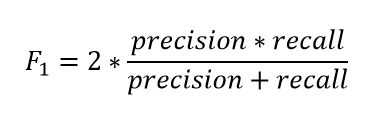

Let us start with a binary prediction problem.

We are predicting if an asteroid will hit the earth or not.


So if we say “No” for the whole training set. Our precision here is 0.
 
What is the recall of our positive class? It is zero. What is the accuracy? It is more than 99%.

And hence the F1 score is also 0. 
And thus we get to know that the classifier that has an accuracy of 99% is basically worthless for our case.

And hence it solves our problem.

**When to use?**

We want to have a model with both good precision and recall.


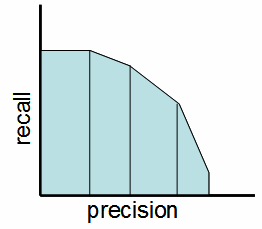

Simply stated the F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

**Caveats**


The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision.

##3. AUC
AUC is the area under the ROC curve.

AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes
What is the ROC curve?


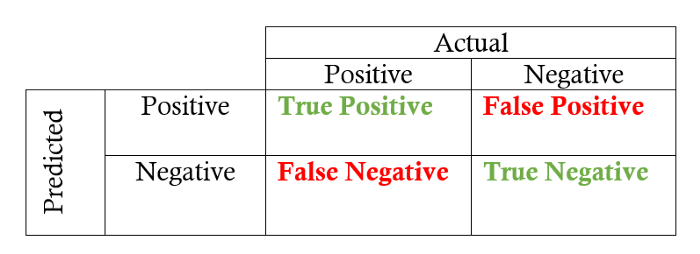

We have got the probabilities from our classifier. 

We can use various threshold values to plot our sensitivity(TPR) and (1-specificity)(FPR) on the cure and we will have a ROC curve.


Where True positive rate or TPR is just the proportion of trues we are capturing using our algorithm.

**Sensitivty = TPR(True Positive Rate)= Recall = TP/(TP+FN)**

and False positive rate or FPR is just the proportion of false we are capturing using our algorithm.

**1- Specificity = FPR(False Positive Rate)= FP/(TN+FP)**



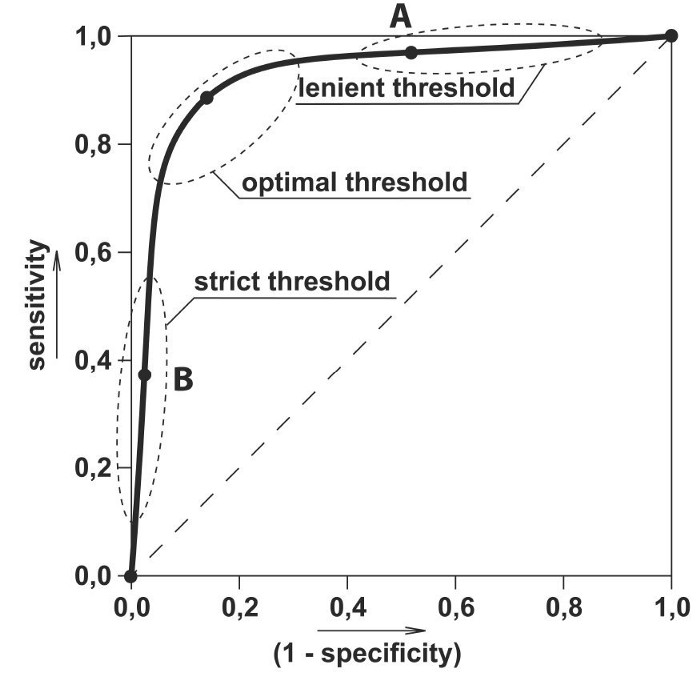

Here we can use the ROC curves to decide on a Threshold value.


The choice of threshold value will also depend on how the classifier is intended to be used.

If it is a cancer classification application you don’t want your threshold to be as big as 0.5. Even if a patient has a 0.3 probability of having cancer you would classify him to be 1.


Otherwise, in an application for reducing the limits on the credit card, you don’t want your threshold to be as less as 0.5. You are here a little worried about the negative effect of decreasing limits on customer satisfaction.



# How to get the evaluation metrics values of our model?



In [ ]:
from sklearn import metrics

### Confusion Matrix

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
y_test_pred = uni_test_results.prediction
confusion = metrics.confusion_matrix(y_test, y_test_pred)
#slice into four pieces
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

confusion

array([[140,  15],
       [ 32,  44]])

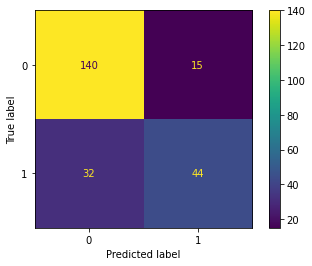

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(uni_logmodel, uni_X_test, y_test, values_format='0.0f')

###**Accuracy:** 
Overall, how often is the classifier correct?

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_test_pred))

0.7965367965367965
0.7965367965367965


###**Precision:**

When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?


In [ ]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_test_pred))

0.7457627118644068
0.7457627118644068


###**Sensitivity AKA Recall:**
 When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate"

In [ ]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_test_pred))

0.5789473684210527
0.5789473684210527


###**Specificity:**

When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting negative instances?

In [ ]:
print(TN / float(TN + FP))

0.9032258064516129


###**F1 score**

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score


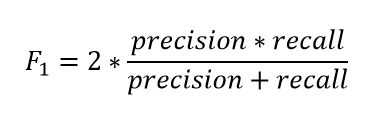

In [ ]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0


Lets try to calculate the f_score of diffrent precision and recall values

In [ ]:
## playing with some values:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [ ]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [ ]:
precision = 0.89
recall = 0.92
f1_score(precision, recall)

0.9047513812154697

#### Calculating F1 score of our model 

In [ ]:
precision = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
f1 = f1_score(precision, recall)
f1

0.6518518518518519

In [ ]:
metrics.f1_score(y_test, y_test_pred)

0.6518518518518519

### Flipping the classified target

What if we classified the 'no diabetes' as 1?
 

In [ ]:
#original recall
print(metrics.recall_score(y_test, y_test_pred))

0.5789473684210527


In [ ]:
#flip 1 and zero will give us different results

y_test_replace = y_test.replace({1:0,0:1})
y_test_pred_replace = y_test_pred.replace({1:0,0:1})

print(metrics.recall_score(y_test_replace, y_test_pred_replace))

0.9032258064516129


##Classification report
We can run a function that give a complete report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       155
           1       0.75      0.58      0.65        76

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



# Adjusting the classification threshold

We can adjust the threshold of the classification to increase or decrease the model sensitivity

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = uni_test_results.probability_1

In [ ]:
#plot the frequency
fig = go.Figure()
trace = go.Histogram(
    x=y_pred_prob,
)
fig.add_trace(trace)

In [ ]:
#change the 1 treshold to be 0.3 using the binarize operation
from sklearn.preprocessing import binarize
y_pred_03 = binarize(X=[y_pred_prob], threshold=0.3)[0]
y_pred_03 = pd.Series(y_pred_03)

In [ ]:
# confusion matrix comparison
print('before confusion matrix\n', confusion)
print('recall',recall)
print('specificity', TN / float(TN + FP))

print('--------------------------------------------------')
confusion03 = metrics.confusion_matrix(y_test, y_pred_03)
print('after confusion matrix\n', confusion03)
print('recall',metrics.recall_score(y_test, y_pred_03))
print('specificity',TP / float(TP + FN))

In [ ]:
#a full classification report comparison
print(classification_report(y_test,y_test_pred))
print('-----------------------------------------------------------------------')
print(classification_report(y_test,y_pred_03))


- **Threshold of 0.5** is used by default to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

## ROC Curves and AUC(Area Under the Curve)

We would like see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

This can be acomplished by calculation the ROC and AUC

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)


In [ ]:
fig=go.Figure()
trace=go.Scatter(x=fp_rate, y=tp_rate, mode='lines', hoverinfo='x+y+text', text=thresholds)
fig.add_trace(trace)
fig.update_layout(
    title="ROC curve for diabetes classifier",
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity/Recall)",
    
)
fig.show()

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context

### Calculate AUC
AUC is the **percentage** of the ROC plot that is **underneath the curve**:

The closer it is to 1 the less FP and FN the model has.

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
AUC = metrics.roc_auc_score(y_test, y_pred_prob)
print('AUC',AUC)

#Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3.  For each unique group:
>1. Take the group as a hold out or test data set
>2.Take the remaining groups as a training data set
>3.Fit a model on the training set and evaluate it on the test set
>4.Retain the evaluation score and discard the model
4.Summarize the skill of the model using the sample of model evaluation scores

###Running the cross validation procedure and get the score.

The score depends on the desired metrics and a full and long list can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules).




In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(uni_logmodel, scaled_X, y, cv=10, scoring='roc_auc')
auc_scores

In [ ]:
accuracy_scores = cross_val_score(uni_logmodel, scaled_X, y, cv=10, scoring='accuracy')
accuracy_scores

In [ ]:
print('Mean values')
print('auc:', auc_scores.mean())
print('accuracy: ', accuracy_scores.mean())
